## Programming exercises

### 2.1 PCA on the Nanose dataset

In this section, we will consider PCA for the Nanose dataset already encountered
in last weeks exercises. The nanose dataset was obtained from the NanoNose project. The data contains 8 sensors named by the letters A-H measuring different levels of concentration of Water, Ethanol, Acetone, Heptane and
Pentanol injected into a small gas chamber. The data will be represented in matrix form such that each row contains the 8 sensors measurements (i.e. sensor A-H) of the various compounds injected into the gas chamber.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("nanonose.csv")
df.head()
df.head()
df[:1]
df=df.drop("Unnamed: 2", axis=1).drop(0)
df.head()
df.iloc[:,[0,1]]
df.columns=["Sample type", "Concentration",'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] 
print(df["Sample type"].value_counts())
df.head()
df.tail()

Heptane     18
Ethanol     18
Water       18
Pentanol    18
Acetone     18
Name: Sample type, dtype: int64


,Sample type,Concentration,A,B,C,D,E,F,G,H
86,Pentanol,192,0.192,3.072000,9.120000,-0.25,1.300,4.787200,11.219200,0.0
87,Pentanol,192,0.192,2.496000,8.736000,-0.25,1.125,5.068800,12.044800,0.0
88,Pentanol,103,0.000,1.287500,5.579167,0.00,0.650,1.845417,6.695000,0.0
89,Pentanol,103,0.000,1.072917,4.935417,0.00,0.800,2.288889,7.024028,0.0
90,Pentanol,103,0.000,1.716667,6.437500,0.00,0.800,1.945556,7.066944,0.0


#### Plot sensors against each other

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

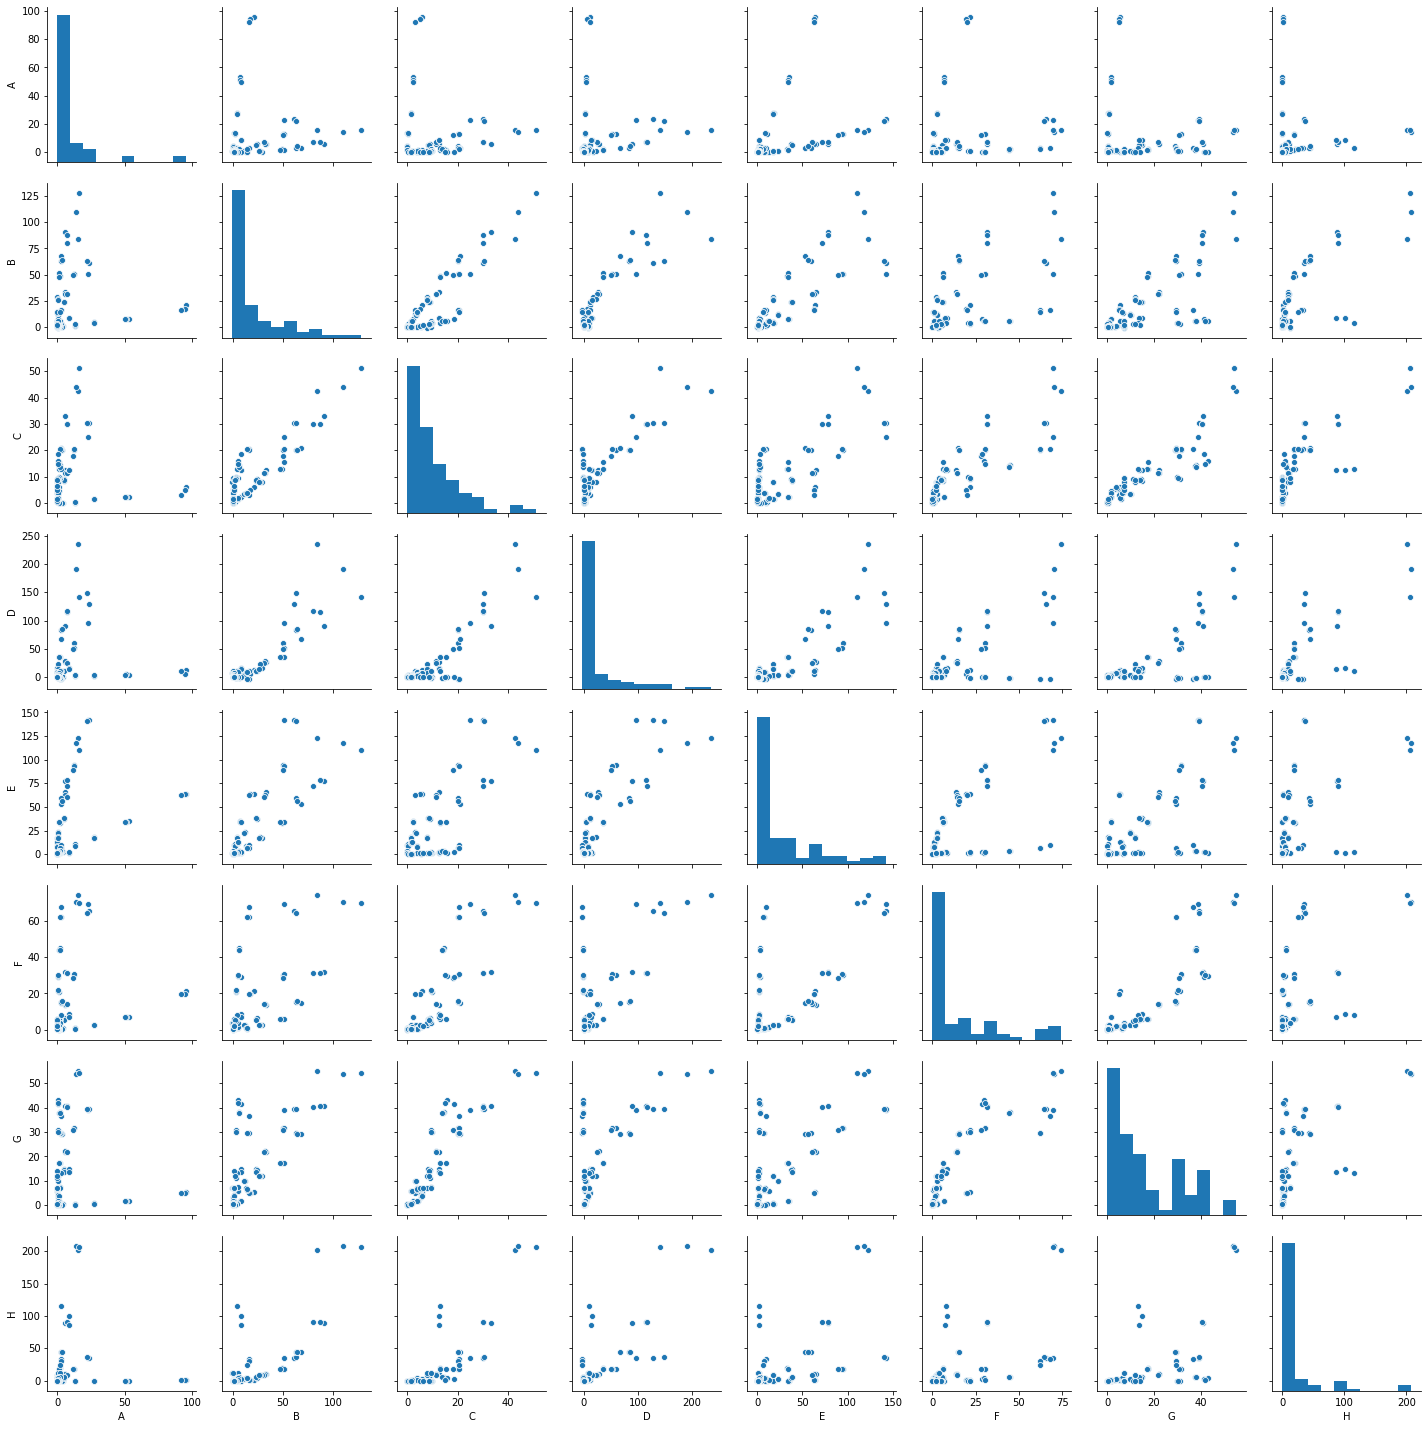

In [5]:
Attribute=df.drop(["Sample type","Concentration"],axis=1)
sns.pairplot(Attribute)
plt.show();

#### Compute the PCA of the NanoNose data using sklearn()

In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import decomposition

In [7]:
Attribute=df.drop(["Concentration","Sample type"],axis=1)
Attribute.tail()
colName=Attribute.columns
scaler=StandardScaler()
#scaler=MinMaxScaler(feature_range=(0, 1))
Attribute_scaled=pd.DataFrame(scaler.fit_transform(Attribute)).set_axis(colName, axis=1,inplace=False)
Attribute_scaled.head()

,A,B,C,D,E,F,G,H
0,4.527278,0.024230,-0.428377,-0.255674,0.978486,0.297845,-0.673097,-0.447339
1,4.474657,-0.119830,-0.523609,-0.399398,0.953531,0.209119,-0.711703,-0.430568
2,4.343103,-0.155845,-0.714072,-0.275362,0.936895,0.216572,-0.697255,-0.461745
3,2.290864,-0.461971,-0.761687,-0.442712,0.200136,-0.407250,-0.925783,-0.471680
4,2.185621,-0.461971,-0.761687,-0.413180,0.170428,-0.412987,-0.927569,-0.473690


In [8]:
pca=decomposition.PCA()
pca.fit(Attribute_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

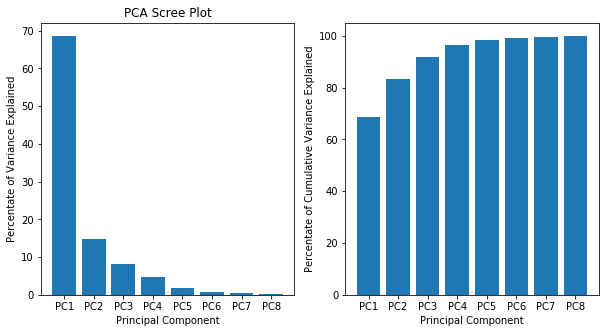

In [9]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ["PC%d"%(i+1) for i in range(0,Attribute_scaled.shape[1])] 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(x= range(0,Attribute_scaled.shape[1]), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')

plt.subplot(1,2,2)
plt.bar(x= range(0,Attribute_scaled.shape[1]), height=np.cumsum(percent_variance), tick_label=columns)
plt.ylabel('Percentate of Cumulative Variance Explained')
plt.xlabel('Principal Component');


Sample type       object
Concentration     object
PC1              float64
PC2              float64
dtype: object


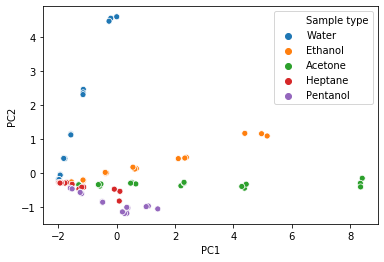

In [10]:
pca_new=decomposition.PCA(n_components=2)
pca_new.fit(Attribute_scaled)
Attribute_reduced=pca_new.transform(Attribute_scaled)
Attribute_reduced=pd.DataFrame(Attribute_reduced).set_axis(["PC1","PC2"],axis=1,inplace=False)
df=df.reset_index().drop("index",axis=1)
df_reduced=df.iloc[:,[0,1]].join(Attribute_reduced)
print(df_reduced.dtypes)
df_reduced['Concentration'] = df["Concentration"].astype(float)
sns.scatterplot(x="PC1",y="PC2",hue="Sample type",data=df_reduced)


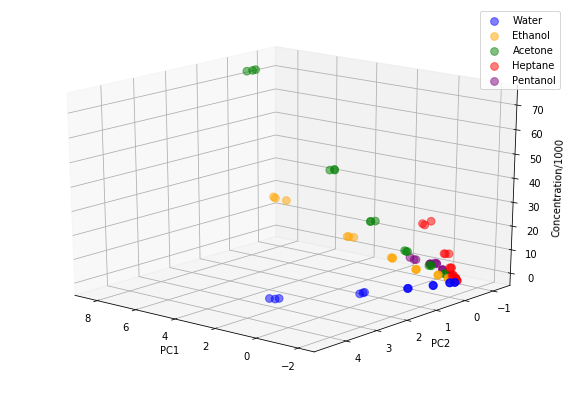

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

solvents=df_reduced["Sample type"].unique().tolist()
colors=["blue","orange","green","red","purple"]


# plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for solvent in solvents:
    color=colors[solvents.index(solvent)]
    ax.scatter(df_reduced[df_reduced["Sample type"]==solvent]['PC1'], 
               df_reduced[df_reduced["Sample type"]==solvent]['PC2'],
               df_reduced[df_reduced["Sample type"]==solvent]['Concentration']/1000, 
               c=color,label=solvent,alpha=0.5,s=60)

    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Concentration/1000')
ax.legend()
ax.view_init(20, 130)
plt.show()

#### Multidimensional scaling (MDS)

In [12]:
from sklearn.manifold import MDS

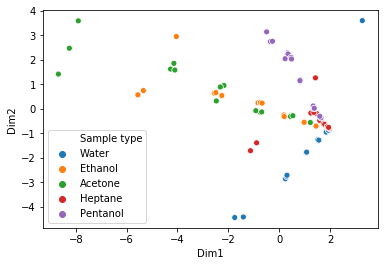

In [13]:
mds=MDS() #by default it maps to 2D (if you want another option, just use the parameter n_components)
mds.fit(Attribute_scaled)


Attribute_reduced=pd.DataFrame([mds.embedding_[:,0].tolist(),mds.embedding_[:,1].tolist()]).T.set_axis(["Dim1","Dim2"],axis=1,inplace=False)
df=df.reset_index().drop("index",axis=1)
df_reduced=df.iloc[:,[0,1]].join(Attribute_reduced)
df_reduced.head()
df_reduced['Concentration'] = df["Concentration"].astype(float)
sns.scatterplot(x="Dim1",y="Dim2",hue="Sample type",data=df_reduced);

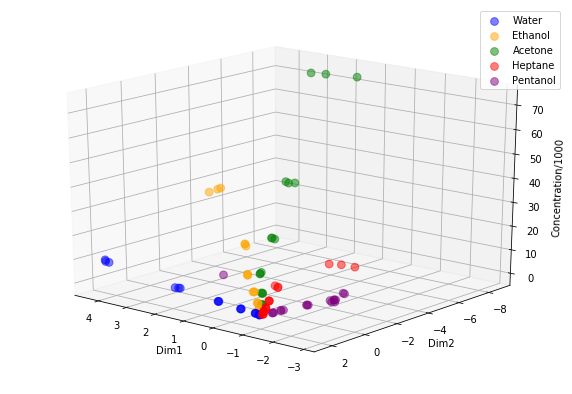

In [21]:
solvents=df_reduced["Sample type"].unique().tolist()
colors=["blue","orange","green","red","purple"]


# plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for solvent in solvents:
    color=colors[solvents.index(solvent)]
    ax.scatter(df_reduced[df_reduced["Sample type"]==solvent]['Dim1'], 
               df_reduced[df_reduced["Sample type"]==solvent]['Dim2'],
               df_reduced[df_reduced["Sample type"]==solvent]['Concentration']/1000, 
               c=color,label=solvent,alpha=0.5,s=60)

    
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Concentration/1000')
ax.legend()
ax.view_init(20, 130)
plt.show()

### 2.2 Structure in handwritten digits

The US Postal Service (USPS) wanted to automate the process of sorting letters based on their zip-codes.

Load from zipdata.mat two datasets containing handwritten digits testdata and traindata.Note how you can load the matlab data (matlab's m-file) to Python environment with `loadmat()` function imported from `scipy.io` module. The
matlab workspace is loaded as dictionary, with keys corresponding to matlab variable names, and values to arrays representing matlab matrices.

In [14]:
from scipy.io import loadmat

In [15]:
# Load Matlab data file to python dict structure
mat_data = loadmat('zipdata.mat')

testdata=mat_data['testdata']
traindata=mat_data['traindata']
print(testdata.shape)
print(traindata.shape)

train=pd.DataFrame(traindata)
test=pd.DataFrame(testdata)

(2007, 257)
(7291, 257)


We start with visualizing the first digit of the traindata (the script uses the function reshape to turn a digit vector into an image and `imshow()` to display the image).

3.0


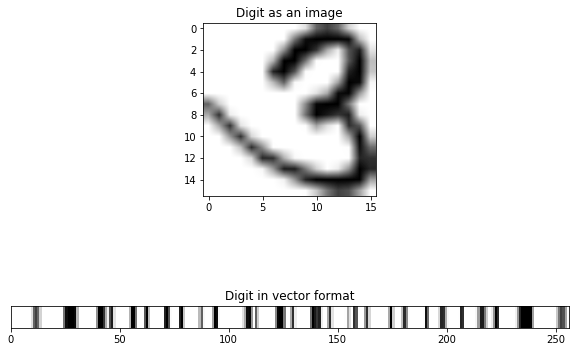

In [24]:
# Index of the digit to display
fig = plt.figure(figsize=(10,7))
i = 666

X=traindata[i][1:]
y=traindata[i][0]
print(y)
X_reshape=X.reshape(16,16)

plt.subplot(2,1,1)
plt.imshow(X_reshape, interpolation='bilinear',cmap="gray_r")
plt.title('Digit as an image');

plt.subplot(2,1,2)
plt.imshow(X.reshape(1,-1),extent=(0,256,0,10),cmap="gray_r")
plt.title('Digit in vector format')
plt.yticks([]);

We want to show that it requires 22 PCA components to account for more than 90% of the variance in the data.
Show that the first principal component is almost sufficient to separate zeros and ones. Examine the first principal component and discuss and understand what it captures.

In [25]:
train=pd.DataFrame(traindata)
train.head()
y=train[0]
X=train.drop(0,axis=1)
X.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [29]:
pca=decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

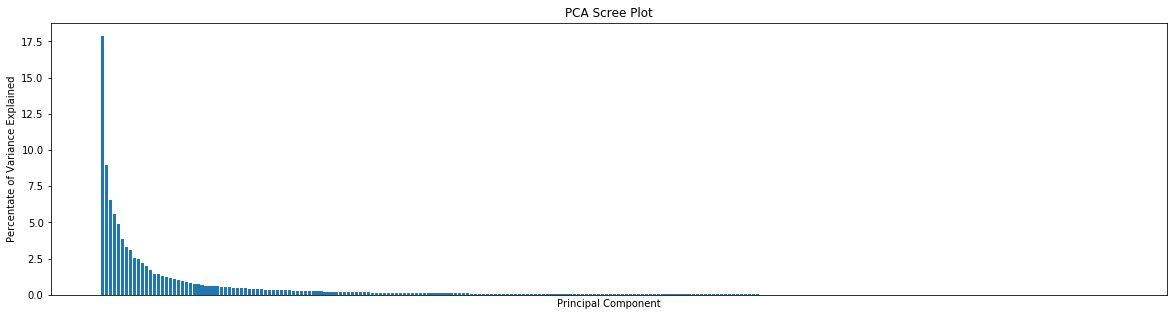

In [30]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ["PC%d"%(i+1) for i in range(0,X.shape[1])] 
plt.figure(figsize=(20,5))

plt.bar(x= range(0,X.shape[1]), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.xticks([]);

In [31]:
Cum_percent_variance=np.cumsum(percent_variance)
print(len(Cum_percent_variance[Cum_percent_variance<70]))

16


Show that the first two principal components are almost sufficient to separate zeros and ones. 

      y        PC1       PC2
7   1.0  -4.897917 -3.176664
8   0.0  12.312802 -0.215817
9   1.0  -4.300276 -3.192328
11  0.0   8.346931 -0.124220
12  1.0  -5.225376 -3.790749
13  1.0  -4.908289 -3.575212
18  0.0  13.707628 -0.880418
19  1.0  -2.995022 -4.721044
29  1.0  -4.475877 -4.463587
34  1.0  -5.115807 -3.842834


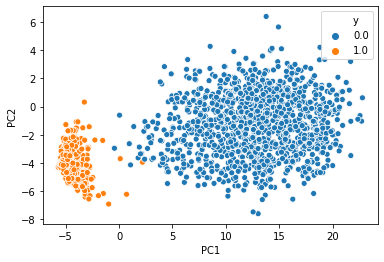

In [67]:
train=pd.DataFrame(traindata)
train.head()
X=train.drop(0,axis=1)
y=train[0]

scaler=StandardScaler()
#scaler=MinMaxScaler(feature_range=(0, 1))

colName=["PC%d"%(i+1) for i in range(X.shape[1])]
X_pca=pd.DataFrame(pca.transform(scaler.fit_transform(X))).set_axis(colName, axis=1,inplace=False)
X_pc1_2=X_pca.iloc[:,[0,1]]
DF=pd.concat([y, X_pc1_2], axis=1)
DF.columns=["y","PC1","PC2"]
DF_new=DF[DF["y"]<2]
print(DF_new.head(10))
sns.scatterplot(x="PC1",y="PC2",hue="y",data=DF_new);

(7291, 29)
(7291, 256)


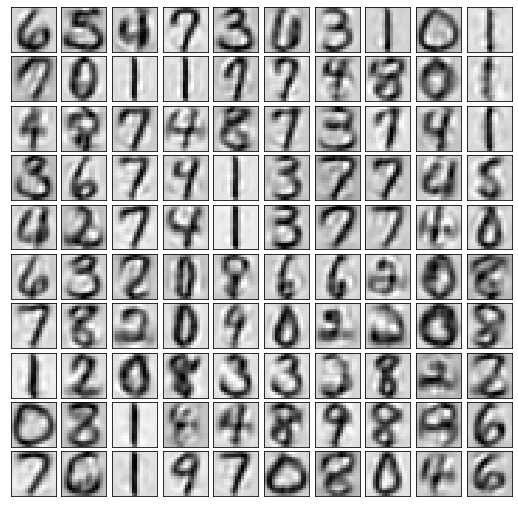

In [68]:
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
Letter_pca=decomposition.PCA(n_components=0.8)
Letter_pca.fit(X)

# by executing transform of the PCA object to get the Eigenvectors out, and 
# then inverse_transform on the Eigenvectors to get all the original images:
components = Letter_pca.transform(X)
projected = Letter_pca.inverse_transform(components)

print(components.shape)
print(projected.shape)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(16,16),cmap="gray_r")



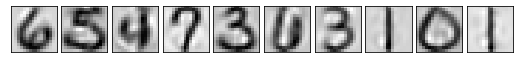

In [83]:
fig, axes = plt.subplots(1,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

X=np.arange(10)
for i, ax in zip(X,axes):
    ax.imshow(projected[i].reshape(16,16),cmap="gray_r")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

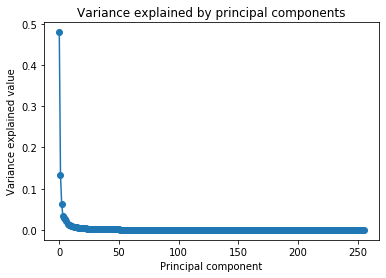

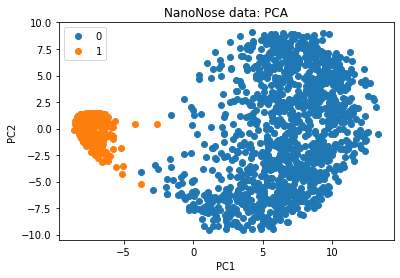

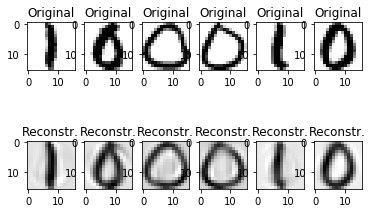

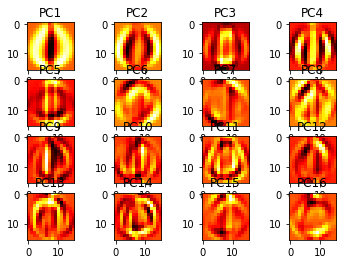

In [41]:
from pylab import *
import scipy.linalg as linalg
from scipy.io import loadmat

# Digits to include in analysis (to include all, n = range(10) )
n = [0,1]
# Number of principal components for reconstruction
K = 16
# Digits to visualize
nD = range(6);


# Load Matlab data file to python dict structure
# and extract variables of interest
traindata = loadmat('zipdata.mat')['traindata']
X = mat(traindata[:,1:])
y = mat(traindata[:,0]).T

N,M = X.shape
C = len(n)

classValues = unique(y.A)
classNames = [str(int(v)) for v in classValues]
classDict = dict(zip(classNames,classValues))


# Select subset of digits classes to be inspected
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = y.A.ravel()==v
    class_mask = class_mask | cmsk
X = X[class_mask,:]
y = y[class_mask,:]
N=X.shape[0]

# Center the data (subtract mean column values)
Xc = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,V = linalg.svd(Xc,full_matrices=False)
U = mat(U)
V = mat(V).T

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

# Project data onto principal component space
Z = Xc * V

# Plot variance explained
figure()
plot(rho,'o-')
title('Variance explained by principal components');
xlabel('Principal component');
ylabel('Variance explained value');


# Plot PCA of the data
f = figure()
#f.hold()
title('NanoNose data: PCA')
for c in n:
    # select indices belonging to class c:
    class_mask = y.A.ravel()==c
    plot(array(Z[class_mask,0]), array(Z[class_mask,1]), 'o')
legend(classNames)
xlabel('PC1')
ylabel('PC2')


# Visualize the reconstructed data from the first K principal components
# Select randomly D digits.
figure()
W = Z[:,range(K)] * V[:,range(K)].T
D = len(nD)
for d in range(D):
    digit_ix = np.random.randint(0,N)
    subplot(2, D, d+1)
    I = reshape(X[digit_ix,:], (16,16))
    imshow(I, cmap=cm.gray_r)
    title('Original')
    subplot(2, D, D+d+1)
    I = reshape(W[digit_ix,:]+X.mean(0), (16,16))
    imshow(I, cmap=cm.gray_r)
    title('Reconstr.');
    

# Visualize the pricipal components
figure()
for k in range(K):
    N1 = ceil(sqrt(K)); N2 = ceil(K/N1)
    subplot(N2, N1, k+1)
    I = reshape(V[:,k], (16,16))
    imshow(I, cmap=cm.hot)
    title('PC{0}'.format(k+1));

# output to screen
show()